# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [57]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url="https://ycharts.com/companies/TSLA/revenues"

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
response = requests.get(url, headers=headers)
data=[]

if response.status_code==200:
    soup = BeautifulSoup(response.content, 'html.parser')
    paneles=soup.find_all('div',class_='panel-content')
    panel=paneles[1]
    tablas=panel.find_all('table')
    for tabla in tablas:
        filas=tabla.find_all('tr')
        for fila in filas:
            tds = fila.find_all('td')
            if len(tds)==2: #Sin el if no funciona, no entiendo el fallo cuando en todas las tr siempre hay dos td
                            #El fallo en concreto es list index out of bound
                fecha = tds[0].get_text(strip=True)
                valor = tds[1].get_text(strip=True)
                data.append([fecha,valor])
                
            

teslaDataframe=pd.DataFrame(data,columns=["Fecha", "Valor"])
"""teslaDataframe["Valor"]=teslaDataframe["Valor"].astype('int')
"""
teslaDataframe["Fecha"]=pd.to_datetime(teslaDataframe['Fecha'])
def convertirEnNumeros(num):
    if "B" in num:
        return float(num.replace("B",""))*1000000000
    else:
        return float(num.replace("M",""))*1000000


teslaDataframe["Valor"]=teslaDataframe["Valor"].apply(convertirEnNumeros)

teslaDataframe

,Fecha,Valor
0,2024-06-30,2.550000e+10
1,2024-03-31,2.130000e+10
2,2023-12-31,2.517000e+10
3,2023-09-30,2.335000e+10
4,2023-06-30,2.493000e+10
5,2023-03-31,2.333000e+10
6,2022-12-31,2.432000e+10
7,2022-09-30,2.145000e+10
8,2022-06-30,1.693000e+10
9,2022-03-31,1.876000e+10


In [58]:
con=sqlite3.connect("TeslaBD")

cursor=con.cursor()
cursor.execute("""
               CREATE TABLE IF NOT EXISTS ganancias(
               Fecha Text,
               Valor Text)""")

teslaDataframe.to_sql('ganancias',con, if_exists='replace', index=False)
con.commit()

# Ejecutar una consulta
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='ganancias'") #Sintaxis para verificar si existe la tabla
print("Table exists:", cursor.fetchone())

# Ejecutar la consulta y mostrar resultados
cursor.execute("SELECT * FROM ganancias")
rows = cursor.fetchall()
print(f"Total de filas insertadas: {len(rows)}")
for row in rows:
    print(row)

Table exists: ('ganancias',)
Total de filas insertadas: 50
('2024-06-30 00:00:00', 25500000000.0)
('2024-03-31 00:00:00', 21300000000.0)
('2023-12-31 00:00:00', 25170000000.0)
('2023-09-30 00:00:00', 23350000000.0)
('2023-06-30 00:00:00', 24930000000.0)
('2023-03-31 00:00:00', 23330000000.0)
('2022-12-31 00:00:00', 24320000000.0)
('2022-09-30 00:00:00', 21450000000.0)
('2022-06-30 00:00:00', 16930000000.0)
('2022-03-31 00:00:00', 18760000000.0)
('2021-12-31 00:00:00', 17720000000.0)
('2021-09-30 00:00:00', 13760000000.0)
('2021-06-30 00:00:00', 11960000000.0)
('2021-03-31 00:00:00', 10390000000.0)
('2020-12-31 00:00:00', 10740000000.0)
('2020-09-30 00:00:00', 8771000000.0)
('2020-06-30 00:00:00', 6036000000.0)
('2020-03-31 00:00:00', 5985000000.0)
('2019-12-31 00:00:00', 7384000000.0)
('2019-09-30 00:00:00', 6303000000.0)
('2019-06-30 00:00:00', 6350000000.0)
('2019-03-31 00:00:00', 4541000000.0)
('2018-12-31 00:00:00', 7226000000.0)
('2018-09-30 00:00:00', 6824000000.0)
('2018-06-30 0

Evolución de las ganancias

<function matplotlib.pyplot.show(close=None, block=None)>

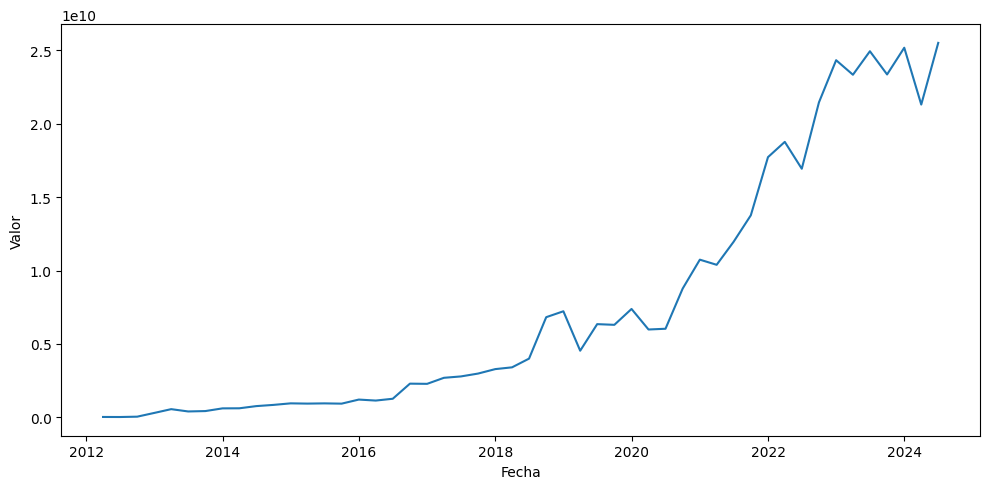

In [59]:
plt.figure(figsize = (10, 5))
#plt.plot(teslaDataframe["Valor"],teslaDataframe["Fecha"])
sns.lineplot(data = teslaDataframe, x = "Fecha", y = "Valor")
plt.tight_layout()
plt.show

Ganancias mensuales

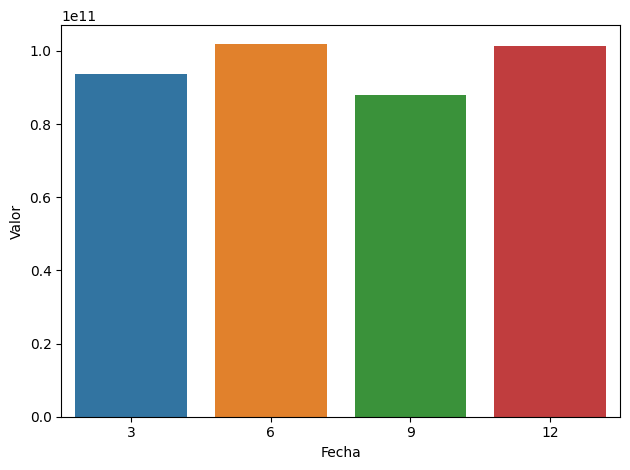

In [70]:
ganaciasMensual = teslaDataframe.groupby(teslaDataframe["Fecha"].dt.month)["Valor"].sum().reset_index()
colores=sns.color_palette(n_colors=len(ganaciasMensual))
y=sns.barplot(data = ganaciasMensual, x = "Fecha", y = "Valor",hue="Fecha",palette=colores,legend=False)
plt.tight_layout()

plt.show()

Ganancias anuales

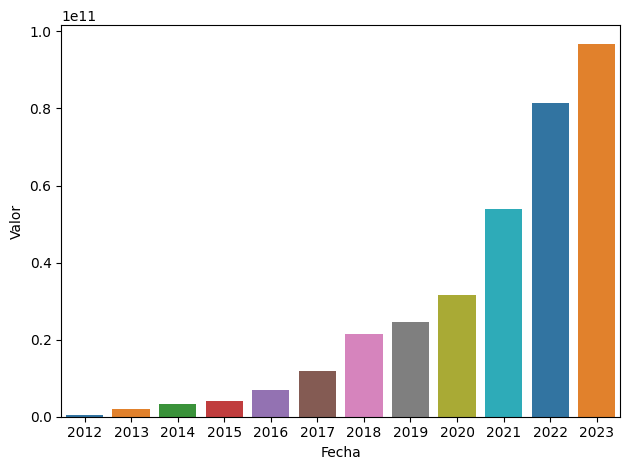

In [61]:
ganaciasAnual = teslaDataframe.groupby(teslaDataframe["Fecha"].dt.year)["Valor"].sum().reset_index()
colores=sns.color_palette(n_colors=len(ganaciasAnual)-1)
sns.barplot(data = ganaciasAnual[ganaciasAnual["Fecha"] < 2024], x = "Fecha", y = "Valor",hue="Valor",palette=colores,legend=False)

plt.tight_layout()

plt.show()